In [37]:
import numpy as np


class Perceptron:
    """
    代码实现 Frank Rosenblatt 提出的感知器的与非门，加深对感知器的理解
    blog: https://www.howie6879.cn/post/33/
    """

    def __init__(self, act_func, input_nums=2):
        """
        实例化一些基本参数
        :param act_func: 激活函数
        """
        # 激活函数
        self.act_func = act_func
        # 权重 已经确定只会有两个二进制输入
        self.w = np.zeros(input_nums)
        # 偏置项
        self.b = 0.0

    def fit(self, input_vectors, labels, learn_nums=10, rate=0.1):
        """
        训练出合适的 w 和 b
        :param input_vectors: 样本训练数据集
        :param labels: 标记值
        :param learn_nums: 学习多少次
        :param rate: 学习率
        """
        for i in range(learn_nums):
            for index, input_vector in enumerate(input_vectors):
                label = labels[index]
                output = self.predict(input_vector)
                delta = label - output
                self.w += input_vector * rate * delta
                self.b += rate * delta
        print("此时感知器权重为{0}，偏置项为{1}".format(self.w, self.b))
        return self

    def predict(self, input_vector):
        if isinstance(input_vector, list):
            input_vector = np.array(input_vector)
        return self.act_func(sum(self.w * input_vector) + self.b)


def f(z):
    """
    激活函数
    :param z: (w1*x1+w2*x2+...+wj*xj) + b
    :return: 1 or 0
    """
    return 1 if z > 0 else 0

def get_nand_gate_training_data():
    '''
    NAND 训练数据集
    '''
    input_vectors = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
    labels = np.array([0, 1, 1, 1])
    return input_vectors, labels

def get_and_gate_training_data():
    '''
    AND 训练数据集
    '''
    input_vectors = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
    labels = np.array([1, 0, 0, 0])
    return input_vectors, labels


def get_or_gate_training_data():
    '''
    OR 训练数据集
    '''
    input_vectors = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
    labels = np.array([1, 1, 1, 0])
    return input_vectors, labels


if __name__ == '__main__':
    """
    输出如下：
        此时感知器权重为[ 0.1  0.2]，偏置项为-0.2 与门
        1 and 1 = 1
        1 and 0 = 0
        0 and 1 = 0
        0 and 0 = 0
        此时感知器权重为[ 0.2  0.2]，偏置项为-0.1 或门
        1 or 1 = 1
        1 or 0 = 1
        0 or 1 = 1
        0 or 0 = 0
        此时感知器权重为[-0.1 -0.2]，偏置项为0.20000000000000004 与非门
        1 nand 1 = 0
        1 nand 0 = 1
        0 nand 1 = 1
        0 nand 0 = 1
    """
    # 获取样本数据
    and_input_vectors, and_labels = get_and_gate_training_data()
    or_input_vectors, or_labels = get_or_gate_training_data()
    nand_input_vectors, nand_labels = get_nand_gate_training_data()
    # 实例化感知器模型
    p = Perceptron(f)
    # 开始学习 AND
    p_and = p.fit(and_input_vectors, and_labels)
    # 开始预测 AND
    print('1 and 1 = %d' % p_and.predict([1, 1]))
    print('1 and 0 = %d' % p_and.predict([1, 0]))
    print('0 and 1 = %d' % p_and.predict([0, 1]))
    print('0 and 0 = %d' % p_and.predict([0, 0]))

    # 开始学习 OR
    p_or = p.fit(or_input_vectors, or_labels)
    # 开始预测 OR
    print('1 or 1 = %d' % p_or.predict([1, 1]))
    print('1 or 0 = %d' % p_or.predict([1, 0]))
    print('0 or 1 = %d' % p_or.predict([0, 1]))
    print('0 or 0 = %d' % p_or.predict([0, 0]))

    # 开始学习 NAND
    p_or = p.fit(nand_input_vectors, nand_labels)
    # 开始预测 NAND
    print('1 nand 1 = %d' % p_or.predict([1, 1]))
    print('1 nand 0 = %d' % p_or.predict([1, 0]))
    print('0 nand 1 = %d' % p_or.predict([0, 1]))
    print('0 nand 0 = %d' % p_or.predict([0, 0]))

此时感知器权重为[0.1 0.2]，偏置项为-0.2
1 and 1 = 1
1 and 0 = 0
0 and 1 = 0
0 and 0 = 0
此时感知器权重为[0.2 0.2]，偏置项为-0.1
1 or 1 = 1
1 or 0 = 1
0 or 1 = 1
0 or 0 = 0
此时感知器权重为[-0.1 -0.2]，偏置项为0.20000000000000004
1 nand 1 = 0
1 nand 0 = 1
0 nand 1 = 1
0 nand 0 = 1


In [38]:
from matplotlib import pyplot as plt
from tensorflow.examples.tutorials.mnist.input_data import read_data_sets

mnist = read_data_sets("../../datasets/MNIST_data/", one_hot=True)

Extracting ../../datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


In [39]:
print("Training data size: %s" % mnist.train.num_examples)
print("Validating data size: %s" % mnist.validation.num_examples)
print("Testing data size: %s" % mnist.test.num_examples)
# 每张图片是长度为784的一维数组
print(len(mnist.train.images[0]))

Training data size: 55000
Validating data size: 5000
Testing data size: 10000
784


样本真实数字为：3


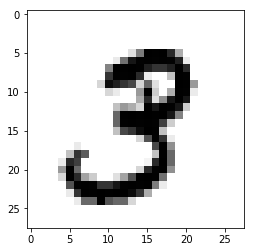

In [40]:
def display_digit(image):
    image = image.reshape([28,28])
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

print("样本真实数字为：%s" % list(mnist.train.labels[1]).index(1))
# 显示图像
display_digit(mnist.train.images[1])

In [53]:
def load_data():
    training_data = (mnist.train.images, np.argmax(mnist.train.labels,axis=1))
    validation_data = (mnist.validation.images, np.argmax(mnist.validation.labels,axis=1))
    test_data = (mnist.test.images, np.argmax(mnist.test.labels,axis=1))
    return (training_data, validation_data, test_data)

In [54]:
a,b,c = load_data()

In [55]:
def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.
    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.
    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    # 每个元素转变成 784 * 1
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (list(training_data), list(validation_data), list(test_data))

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [56]:
training_data, validation_data, test_data = load_data_wrapper()

In [57]:
len(training_data), len(validation_data), len(test_data)

(55000, 5000, 10000)

In [59]:
import network

# 输入层 784
# 隐藏层 30
# 输出层 10
sizes = [784, 30, 10]
net = network.Network(sizes = sizes)

In [58]:
# 随机梯度下降开始训练
net.SGD(
    training_data = training_data, 
    epochs = 30, 
    mini_batch_size = 10, 
    eta = 3.0, 
    test_data = test_data
)

Epoch 0: 9095 / 10000
Epoch 1: 9256 / 10000
Epoch 2: 9285 / 10000
Epoch 3: 9360 / 10000
Epoch 4: 9376 / 10000
Epoch 5: 9427 / 10000
Epoch 6: 9360 / 10000
Epoch 7: 9417 / 10000
Epoch 8: 9458 / 10000
Epoch 9: 9453 / 10000
Epoch 10: 9474 / 10000
Epoch 11: 9419 / 10000
Epoch 12: 9461 / 10000
Epoch 13: 9480 / 10000
Epoch 14: 9456 / 10000
Epoch 15: 9518 / 10000
Epoch 16: 9470 / 10000
Epoch 17: 9497 / 10000
Epoch 18: 9459 / 10000
Epoch 19: 9483 / 10000
Epoch 20: 9478 / 10000
Epoch 21: 9463 / 10000
Epoch 22: 9497 / 10000
Epoch 23: 9484 / 10000
Epoch 24: 9492 / 10000
Epoch 25: 9469 / 10000
Epoch 26: 9506 / 10000
Epoch 27: 9502 / 10000
Epoch 28: 9516 / 10000
Epoch 29: 9478 / 10000


[(30, 1), (10, 1)]

In [62]:
sizes[1:]

[30, 10]

In [67]:
for x, y in zip(sizes[:-1], sizes[1:]):
    print(x,y)

784 30
30 10


In [68]:
sizes[:-1]

[784, 30]

In [70]:
for i in zip(sizes[:-1], sizes[1:]):
    print(i)

(784, 30)
(30, 10)


In [79]:
np.random.randn(784 ,30)[0]

array([ 0.25667548, -0.29829349, -0.262266  ,  0.35565521,  1.03144741,
        0.63067711,  0.07978447, -0.56181495, -0.30206575,  0.01192992,
       -1.30813965,  0.49001527, -1.12133488, -0.94063309, -0.31619972,
        0.83863362, -0.23142991, -0.65693285,  0.84201269,  1.0497373 ,
        0.25007258,  0.2987249 ,  1.40500392, -2.47943017, -1.05933841,
        0.43264895,  0.70571854,  1.02192206,  1.06170174,  0.45355222])